In [2]:
import os
import numpy as np
import pandas as pd
import polars as pl

mmap_dir = r"C:\Users\musab\mmap_files_combined_02"

mmap_files = [file for file in os.listdir(mmap_dir) if file.endswith('.mmap')]

dfs = []
for mmap_file in mmap_files:
    file_path = os.path.join(mmap_dir, mmap_file)
    data = np.memmap(file_path, dtype=np.float32, mode='r')
    reshaped_data = data.reshape((-1, 22))
    df = pd.DataFrame(reshaped_data)
    dfs.append((mmap_file, df)) 

pl_dfs = []
for idx, (mmap_file, df) in enumerate(dfs):
    pl_df = pl.from_pandas(df)
    pl_dfs.append((mmap_file, pl_df))

for idx, (mmap_file, pl_df) in enumerate(pl_dfs):
    print(f"Polars DataFrame {idx + 1} - {mmap_file}:")
    print(pl_df)
    print()

Polars DataFrame 1 - combined.mmap:
shape: (232_716, 22)
┌───────────┬───────────┬─────────────┬────────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ 0         ┆ 1         ┆ 2           ┆ 3          ┆ … ┆ 18       ┆ 19        ┆ 20        ┆ 21        │
│ ---       ┆ ---       ┆ ---         ┆ ---        ┆   ┆ ---      ┆ ---       ┆ ---       ┆ ---       │
│ f32       ┆ f32       ┆ f32         ┆ f32        ┆   ┆ f32      ┆ f32       ┆ f32       ┆ f32       │
╞═══════════╪═══════════╪═════════════╪════════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ 4.419989  ┆ 2.244836  ┆ -3.3264e-12 ┆ 6.2569e-12 ┆ … ┆ 0.470273 ┆ 0.301703  ┆ -0.141953 ┆ -0.425347 │
│ 3.973331  ┆ 2.046789  ┆ -2.9213e-12 ┆ 4.8830e-12 ┆ … ┆ 0.553734 ┆ 0.312252  ┆ -0.090638 ┆ -0.451351 │
│ 4.150972  ┆ -1.206805 ┆ -2.2860e-12 ┆ 2.6708e-12 ┆ … ┆ 0.679586 ┆ 0.116179  ┆ 0.137392  ┆ -0.49774  │
│ 4.029315  ┆ -0.107056 ┆ -2.6454e-12 ┆ 4.7516e-12 ┆ … ┆ 1.015999 ┆ -0.510315 ┆ 0.171102  ┆ 0.103043  │
│ …    

In [3]:
from sklearn.model_selection import train_test_split
import gc

def rename_columns(df):
    df.columns = ['Wind_Speed', 'Yaw_Error', 'Pitch_Angle_B1', 'Pitch_Angle_B2', 'Pitch_Angle_B3', 'Rotorposition', 'Generator_Speed', 'Rotor_Speed', 'Generator_Torque', 'Power', 'YAW_Bearing_THRUST', 'Acceleration_CROSS', 'Acceleration_THRUST', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'Tower_Deflection_RES', 'Tip_Deflection_flap_V1', 'Tip_Deflection_flap_V2', 'Tip_Deflection_flap_V3', 'Tip_Deflection_edge_V1', 'Tip_Deflection_edge_V2', 'Tip_Deflection_edge_V3']

big_raw_train_df = pd.DataFrame()
big_raw_test_df = pd.DataFrame()

for idx, (mmap_file, df) in enumerate(dfs):
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

    if 'File' in train_df.columns:
        train_df.drop(columns=['File'], inplace=True)
    if 'File' in test_df.columns:
        test_df.drop(columns=['File'], inplace=True)

    rename_columns(train_df)
    rename_columns(test_df)

    big_raw_train_df = pd.concat([big_raw_train_df, train_df])
    big_raw_test_df = pd.concat([big_raw_test_df, test_df])

    del train_df, test_df
    gc.collect()

big_raw_train_df.reset_index(drop=True, inplace=True)
big_raw_test_df.reset_index(drop=True, inplace=True)


In [4]:
big_raw_test_df

,Wind_Speed,Yaw_Error,Pitch_Angle_B1,Pitch_Angle_B2,Pitch_Angle_B3,Rotorposition,Generator_Speed,Rotor_Speed,Generator_Torque,Power,...,Acceleration_THRUST,Tower_Deflection_Y,Tower_Deflection_Z,Tower_Deflection_RES,Tip_Deflection_flap_V1,Tip_Deflection_flap_V2,Tip_Deflection_flap_V3,Tip_Deflection_edge_V1,Tip_Deflection_edge_V2,Tip_Deflection_edge_V3
0,24.350641,-0.485751,22.531853,22.531853,22.531853,331.569824,1179.520142,14.840208,16.827023,2078.500244,...,0.211806,-0.014854,0.265874,0.266277,1.144347,0.599686,1.933802,-0.093178,0.571424,-0.139755
1,21.000713,4.672786,24.427351,24.427351,24.427351,273.388031,1141.988037,14.302549,17.155235,2051.586914,...,0.323391,-0.038548,0.103614,0.110522,2.092339,1.670752,1.555380,-0.102435,0.289242,0.188648
2,16.187807,-11.019016,13.598194,13.598194,13.598194,1.822408,1154.760010,14.523351,17.073954,2064.727295,...,-0.138967,-0.098886,0.333131,0.347470,-1.680712,0.226773,0.080478,-0.181325,0.389764,-0.346362
3,13.939187,13.384372,11.655615,11.655615,11.655615,105.473587,1152.637085,14.497416,16.910069,2041.128052,...,0.074527,0.003257,0.279273,0.279305,0.162180,-0.692896,-0.566474,0.375032,-0.371229,-0.169939
4,17.667007,-17.266090,17.677628,17.677628,17.677628,212.081161,1162.569458,14.653666,16.743643,2038.477051,...,0.150583,-0.122399,0.175887,0.214253,1.930716,0.980625,0.080069,-0.170593,-0.084701,0.382337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46539,14.443846,8.751769,11.103955,11.103955,11.103955,350.475311,1170.621704,14.742860,16.882877,2069.628662,...,0.083570,0.027764,0.382469,0.383450,-0.632024,-0.975219,-1.236883,-0.099632,0.350268,-0.422355
46540,13.923987,-6.232132,13.797745,13.797745,13.797745,332.903778,1159.915283,14.594883,16.766283,2036.500366,...,-0.033883,-0.055578,0.223084,0.229916,0.704507,-0.397494,0.392326,-0.214959,0.414801,-0.281537
46541,26.106319,13.654675,24.100578,24.100578,24.100578,145.731674,1158.490845,14.571653,16.883776,2048.286865,...,-0.216512,-0.038392,0.369401,0.371372,2.632602,0.982190,2.127989,0.646538,-0.486151,0.286144
46542,4.669010,25.983118,0.000000,0.000000,0.000000,243.799774,621.767212,7.820079,1.548617,100.811012,...,-0.024762,0.012237,0.073007,0.074028,0.889633,0.551824,0.580183,-0.441115,-0.063889,0.245059


from sklearn.model_selection import train_test_split
import gc

big_raw_train_df = pd.DataFrame()
big_raw_test_df = pd.DataFrame()

for idx, (mmap_file, df) in enumerate(dfs):
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

    if 'File' in train_df.columns:
        train_df.drop(columns=['File'], inplace=True)
    if 'File' in test_df.columns:
        test_df.drop(columns=['File'], inplace=True)

    big_raw_train_df = pd.concat([big_raw_train_df, train_df])
    big_raw_test_df = pd.concat([big_raw_test_df, test_df])

    del train_df, test_df
    gc.collect()

big_raw_train_df.reset_index(drop=True, inplace=True)
big_raw_test_df.reset_index(drop=True, inplace=True)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train = big_raw_train_df.drop(columns=[0]) 
y_train = big_raw_train_df[0] 

X_test = big_raw_test_df.drop(columns=[0]) 
y_test = big_raw_test_df[0] 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time_steps = 1  # Each row represents 0.03 seconds 
features = X_train_scaled.shape[1]
X_train_reshaped = X_train_scaled.reshape(-1, time_steps, features)
X_test_reshaped = X_test_scaled.reshape(-1, time_steps, features)

model = Sequential()
model.add(LSTM(100, input_shape=(time_steps, features)))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, verbose=0)

y_pred_test = model.predict(X_test_reshaped).flatten()

test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_test)

print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


1455/1455 [==============================] - 2s 911us/step
Test MAE: 0.84135836
Test MSE: 1.3705935
Test RMSE: 1.1707236
Test R2: 0.9676251446003515


In [8]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train = big_raw_train_df.drop(columns=[0]) 
y_train = big_raw_train_df[0] 

X_test = big_raw_test_df.drop(columns=[0]) 
y_test = big_raw_test_df[0] 

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

test_mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_pred_xgb)
test_rmse_xgb = np.sqrt(test_mse_xgb)
test_r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost:")
print("Test MAE:", test_mae_xgb)
print("Test MSE:", test_mse_xgb)
print("Test RMSE:", test_rmse_xgb)
print("Test R2:", test_r2_xgb)


XGBoost:
Test MAE: 0.86222905
Test MSE: 1.4273169
Test RMSE: 1.1947037
Test R2: 0.9662852793425248


In [11]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train = big_raw_train_df.drop(columns=[0]) 
y_train = big_raw_train_df[0] 

X_test = big_raw_test_df.drop(columns=[0])  
y_test = big_raw_test_df[0] 

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

test_mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
test_mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
test_rmse_lgbm = np.sqrt(test_mse_lgbm)
test_r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("LightGBM:")
print("Test MAE:", test_mae_lgbm)
print("Test MSE:", test_mse_lgbm)
print("Test RMSE:", test_rmse_lgbm)
print("Test R2:", test_r2_lgbm)


C:\ProgramData\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\ProgramData\anaconda3\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\ProgramData\anaconda3\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 186172, number of used features: 20
[LightGBM] [Info] Start training from score 14.557465
LightGBM:
Test MAE: 0.8829176448486417
Test MSE: 1.5001094101087928
Test RMSE: 1.2247895370669986
Test R2: 0.9645658438680337


In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


X_train = big_raw_train_df.drop(columns=[0])  
y_train = big_raw_train_df[0] 
X_test = big_raw_test_df.drop(columns=[0]) 
y_test = big_raw_test_df[0] 

scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

X_train_reshaped = X_train_scaled.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, verbose=0)

y_pred_scaled_lstm = lstm_model.predict(X_test_reshaped).flatten()

y_pred_lstm = scaler_y.inverse_transform(y_pred_scaled_lstm.reshape(-1, 1)).flatten()

test_mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
test_mse_lstm = mean_squared_error(y_test, y_pred_lstm)
test_rmse_lstm = np.sqrt(test_mse_lstm)
test_r2_lstm = r2_score(y_test, y_pred_lstm)

print("LSTM:")
print("Test MAE:", test_mae_lstm)
print("Test MSE:", test_mse_lstm)
print("Test RMSE:", test_rmse_lstm)
print("Test R2:", test_r2_lstm)


1455/1455 [==============================] - 5s 3ms/step
LSTM:
Test MAE: 0.8572096
Test MSE: 1.4071674
Test RMSE: 1.1862409
Test R2: 0.9667612296593849


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X_train = big_raw_train_df.drop(columns=['Wind_Speed', 'Tower_Deflection_RES', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'YAW_Bearing_THRUST'])
y_train = big_raw_train_df['Wind_Speed']

X_test = big_raw_test_df.drop(columns=['Wind_Speed', 'Tower_Deflection_RES', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'YAW_Bearing_THRUST'])
y_test = big_raw_test_df['Wind_Speed']

def create_lstm_input(data, time_steps):
    X_lstm, y_lstm = [], []
    for i in range(len(data) - time_steps):
        X_lstm.append(data[i:(i + time_steps)])
        y_lstm.append(data[i + time_steps])
    return np.array(X_lstm), np.array(y_lstm)

time_steps = 50
X_train_lstm, y_train_lstm = create_lstm_input(y_train.values, time_steps)
X_test_lstm, y_test_lstm = create_lstm_input(y_test.values, time_steps)

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 1))) 
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_split=0.1)

predictions = model.predict(X_test_lstm)

rmse_wind_speed = mean_squared_error(y_test_lstm, predictions, squared=False)
mae_wind_speed = mean_absolute_error(y_test_lstm, predictions)
mse_wind_speed = mean_squared_error(y_test_lstm, predictions)
r2_wind_speed = r2_score(y_test_lstm, predictions)

print("Root Mean Squared Error (RMSE) for Wind Speed:", rmse_wind_speed)
print("Mean Absolute Error (MAE) for Wind Speed:", mae_wind_speed)
print("Mean Squared Error (MSE) for Wind Speed:", mse_wind_speed)
print("R-squared (R2) for Wind Speed:", r2_wind_speed)


Epoch 1/20
5235/5235 [==============================] - 92s 17ms/step - loss: 42.8272 - val_loss: 42.2111
Epoch 2/20
5235/5235 [==============================] - 89s 17ms/step - loss: 42.4388 - val_loss: 42.2592
Epoch 3/20
5235/5235 [==============================] - 88s 17ms/step - loss: 42.4047 - val_loss: 42.5725
Epoch 4/20
5235/5235 [==============================] - 83s 16ms/step - loss: 42.3725 - val_loss: 42.1908
Epoch 5/20
5235/5235 [==============================] - 83s 16ms/step - loss: 42.3669 - val_loss: 42.2647
Epoch 6/20
5235/5235 [==============================] - 83s 16ms/step - loss: 42.3568 - val_loss: 42.6418
Epoch 7/20
5235/5235 [==============================] - 83s 16ms/step - loss: 42.3476 - val_loss: 42.2414
Epoch 8/20
5235/5235 [==============================] - 83s 16ms/step - loss: 42.3405 - val_loss: 42.3242
Epoch 9/20
5235/5235 [==============================] - 83s 16ms/step - loss: 42.3400 - val_loss: 42.1784
Epoch 10/20
5235/5235 [=======================

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


X_train = big_raw_train_df.drop(columns=['Wind_Speed', 'Tower_Deflection_RES', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'YAW_Bearing_THRUST'])
y_train = big_raw_train_df['Wind_Speed']

X_test = big_raw_test_df.drop(columns=['Wind_Speed', 'Tower_Deflection_RES', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'YAW_Bearing_THRUST'])
y_test = big_raw_test_df['Wind_Speed']

def create_lstm_input(data, time_steps):
    X_lstm, y_lstm = [], []
    for i in range(len(data) - time_steps):
        X_lstm.append(data[i:(i + time_steps)])
        y_lstm.append(data[i + time_steps])
    return np.array(X_lstm), np.array(y_lstm)

time_steps = int(1 / 0.03)  

X_train_lstm, y_train_lstm = create_lstm_input(y_train.values, time_steps)
X_test_lstm, y_test_lstm = create_lstm_input(y_test.values, time_steps)

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(time_steps, 1))) 
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_split=0.1)

predictions = model.predict(X_test_lstm)

rmse = mean_squared_error(y_test_lstm, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Epoch 1/10
5236/5236 [==============================] - 47s 9ms/step - loss: 42.9345 - val_loss: 42.2896
Epoch 2/10
5236/5236 [==============================] - 48s 9ms/step - loss: 42.4708 - val_loss: 42.2336
Epoch 3/10
5236/5236 [==============================] - 48s 9ms/step - loss: 42.4110 - val_loss: 42.7680
Epoch 4/10
5236/5236 [==============================] - 48s 9ms/step - loss: 42.3981 - val_loss: 42.1706
Epoch 5/10
5236/5236 [==============================] - 48s 9ms/step - loss: 42.3766 - val_loss: 42.1621
Epoch 6/10
5236/5236 [==============================] - 48s 9ms/step - loss: 42.3877 - val_loss: 42.3731
Epoch 7/10
5236/5236 [==============================] - 48s 9ms/step - loss: 42.3531 - val_loss: 42.5026
Epoch 8/10
5236/5236 [==============================] - 47s 9ms/step - loss: 42.3555 - val_loss: 42.1659
Epoch 9/10
5236/5236 [==============================] - 47s 9ms/step - loss: 42.3480 - val_loss: 42.1956
Epoch 10/10
1454/1454 [==============================] 

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error


X_train = big_raw_train_df.drop(columns=['Wind_Speed', 'Tower_Deflection_RES', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'YAW_Bearing_THRUST'])
y_train = big_raw_train_df['Wind_Speed']

X_test = big_raw_test_df.drop(columns=['Wind_Speed', 'Tower_Deflection_RES', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'YAW_Bearing_THRUST'])
y_test = big_raw_test_df['Wind_Speed']

def create_gru_input(data, time_steps):
    X_gru, y_gru = [], []
    for i in range(len(data) - time_steps):
        X_gru.append(data[i:(i + time_steps)])
        y_gru.append(data[i + time_steps])
    return np.array(X_gru), np.array(y_gru)

#time_steps = int(1 / 0.03) 
time_steps = 10

X_train_gru, y_train_gru = create_gru_input(y_train.values, time_steps)
X_test_gru, y_test_gru = create_gru_input(y_test.values, time_steps)

model_gru = Sequential()
model_gru.add(GRU(64, activation='relu', input_shape=(time_steps, 1)))
model_gru.add(Dense(1))  

model_gru.compile(optimizer='adam', loss='mean_squared_error')

model_gru.fit(X_train_gru, y_train_gru, epochs=50, batch_size=32, validation_split=0.1)

predictions_gru = model_gru.predict(X_test_gru)

rmse_gru = mean_squared_error(y_test_gru, predictions_gru, squared=False)
print("Root Mean Squared Error (RMSE) for GRU:", rmse_gru)


Epoch 1/50
5236/5236 [==============================] - 19s 3ms/step - loss: 43.3887 - val_loss: 43.0161
Epoch 2/50
5236/5236 [==============================] - 17s 3ms/step - loss: 42.4536 - val_loss: 42.1836
Epoch 3/50
5236/5236 [==============================] - 17s 3ms/step - loss: 42.4320 - val_loss: 42.2540
Epoch 4/50
5236/5236 [==============================] - 18s 3ms/step - loss: 42.4229 - val_loss: 42.2339
Epoch 5/50
5236/5236 [==============================] - 18s 3ms/step - loss: 42.3921 - val_loss: 42.4413
Epoch 6/50
5236/5236 [==============================] - 18s 3ms/step - loss: 42.3882 - val_loss: 42.1801
Epoch 7/50
5236/5236 [==============================] - 18s 3ms/step - loss: 42.3689 - val_loss: 42.2352
Epoch 8/50
5236/5236 [==============================] - 18s 3ms/step - loss: 42.3741 - val_loss: 42.4218
Epoch 9/50
5236/5236 [==============================] - 18s 3ms/step - loss: 42.3662 - val_loss: 42.2654
Epoch 10/50
5236/5236 [==============================] 

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, Add, Dropout, Flatten
import tensorflow as tf


X_train = big_raw_train_df.drop(columns=['Wind_Speed', 'Tower_Deflection_RES', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'YAW_Bearing_THRUST'])
y_train = big_raw_train_df['Wind_Speed']

X_test = big_raw_test_df.drop(columns=['Wind_Speed', 'Tower_Deflection_RES', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'YAW_Bearing_THRUST'])
y_test = big_raw_test_df['Wind_Speed']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def create_transformer_input(data, time_steps):
    X_transformer, y_transformer = [], []
    for i in range(len(data) - time_steps):
        X_transformer.append(data[i:(i + time_steps)])
        y_transformer.append(data[i + time_steps])
    return np.array(X_transformer), np.array(y_transformer)

time_steps = int(1 / 0.03) 

X_train_transformer, y_train_transformer = create_transformer_input(y_train.values, time_steps)
X_test_transformer, y_test_transformer = create_transformer_input(y_test.values, time_steps)

def positional_encoding(inputs, time_steps, d_model):
    pos_encoding = np.zeros((time_steps, d_model))
    for pos in range(time_steps):
        for i in range(d_model):
            angle = pos / np.power(10000, 2 * i / d_model)
            pos_encoding[pos, i] = np.sin(angle) if i % 2 == 0 else np.cos(angle)
    return tf.convert_to_tensor(pos_encoding, dtype=tf.float32)

def transformer_model(input_shape, time_steps):
    d_model = input_shape[-1]
    inputs = Input(shape=input_shape)
    
    pos_encoding = positional_encoding(inputs, time_steps, d_model)
    x = inputs + pos_encoding
    
    x = MultiHeadAttention(key_dim=d_model, num_heads=2)(x, x, x)  
    x = Add()([x, inputs])
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.1)(x)
    
    x = Flatten()(x)
    outputs = Dense(1)(x) 
    
    model = Model(inputs, outputs)
    return model

model_transformer = transformer_model(input_shape=(time_steps, 1), time_steps=time_steps)

model_transformer.compile(optimizer='adam', loss='mean_squared_error')

model_transformer.fit(X_train_transformer, y_train_transformer, epochs=30, batch_size=32, validation_split=0.1)

predictions_transformer = model_transformer.predict(X_test_transformer)

rmse_transformer = mean_squared_error(y_test_transformer, predictions_transformer, squared=False)
print("Root Mean Squared Error (RMSE) for Transformer:", rmse_transformer)


Epoch 1/30
5236/5236 [==============================] - 18s 3ms/step - loss: 189.5870 - val_loss: 133.9376
Epoch 2/30
5236/5236 [==============================] - 16s 3ms/step - loss: 97.3462 - val_loss: 67.1161
Epoch 3/30
5236/5236 [==============================] - 17s 3ms/step - loss: 52.5816 - val_loss: 43.5606
Epoch 4/30
5236/5236 [==============================] - 17s 3ms/step - loss: 42.5236 - val_loss: 42.1619
Epoch 5/30
5236/5236 [==============================] - 17s 3ms/step - loss: 42.2591 - val_loss: 42.1630
Epoch 6/30
5236/5236 [==============================] - 17s 3ms/step - loss: 42.2589 - val_loss: 42.1632
Epoch 7/30
5236/5236 [==============================] - 18s 3ms/step - loss: 42.2590 - val_loss: 42.1618
Epoch 8/30
5236/5236 [==============================] - 17s 3ms/step - loss: 42.2589 - val_loss: 42.1614
Epoch 9/30
5236/5236 [==============================] - 17s 3ms/step - loss: 42.2589 - val_loss: 42.1627
Epoch 10/30
5236/5236 [==============================

In [7]:
# Calculate correlation matrix
correlation_matrix = big_raw_train_df.corr()

# Get the correlation of each feature with the target variable (Wind_Speed)
wind_speed_correlation = correlation_matrix['Wind_Speed'].drop('Wind_Speed')

# Sort by absolute correlation value (in descending order)
wind_speed_correlation = wind_speed_correlation.abs().sort_values(ascending=False)

print(wind_speed_correlation)


Pitch_Angle_B1            0.955663
Pitch_Angle_B2            0.955663
Pitch_Angle_B3            0.955663
Power                     0.761215
Generator_Torque          0.758130
Rotor_Speed               0.661288
Generator_Speed           0.661267
Tip_Deflection_flap_V3    0.621750
Tip_Deflection_flap_V2    0.621437
Tip_Deflection_flap_V1    0.619261
Tip_Deflection_edge_V1    0.332481
Tip_Deflection_edge_V3    0.331964
Tip_Deflection_edge_V2    0.328215
YAW_Bearing_THRUST        0.165027
Tower_Deflection_Y        0.114790
Tower_Deflection_Z        0.054378
Tower_Deflection_RES      0.026803
Acceleration_THRUST       0.003964
Acceleration_CROSS        0.003065
Yaw_Error                 0.001541
Rotorposition             0.000474
Name: Wind_Speed, dtype: float64


In [8]:
highly_correlated_features = ['Pitch_Angle_B1', 'Pitch_Angle_B2', 'Pitch_Angle_B3', 'Power', 'Generator_Torque']

n = 5

Feature Importances for Highly Correlated Features:
Pitch_Angle_B2            0.304273
Pitch_Angle_B1            0.281759
Pitch_Angle_B3            0.267458
Power                     0.105117
Generator_Torque          0.008919
Power_lag_1               0.002141
Generator_Torque_lag_1    0.002119
Generator_Torque_lag_3    0.002114
Generator_Torque_lag_2    0.002110
Generator_Torque_lag_5    0.002098
Power_lag_3               0.002096
Power_lag_4               0.002091
Power_lag_5               0.002080
Power_lag_2               0.002078
Generator_Torque_lag_4    0.002053
Pitch_Angle_B2_lag_3      0.000775
Pitch_Angle_B1_lag_1      0.000775
Pitch_Angle_B2_lag_2      0.000771
Pitch_Angle_B3_lag_3      0.000770
Pitch_Angle_B1_lag_3      0.000770
Pitch_Angle_B3_lag_1      0.000767
Pitch_Angle_B2_lag_4      0.000767
Pitch_Angle_B3_lag_4      0.000767
Pitch_Angle_B1_lag_4      0.000767
Pitch_Angle_B1_lag_2      0.000764
Pitch_Angle_B2_lag_1      0.000763
Pitch_Angle_B3_lag_2      0.000762
Pit

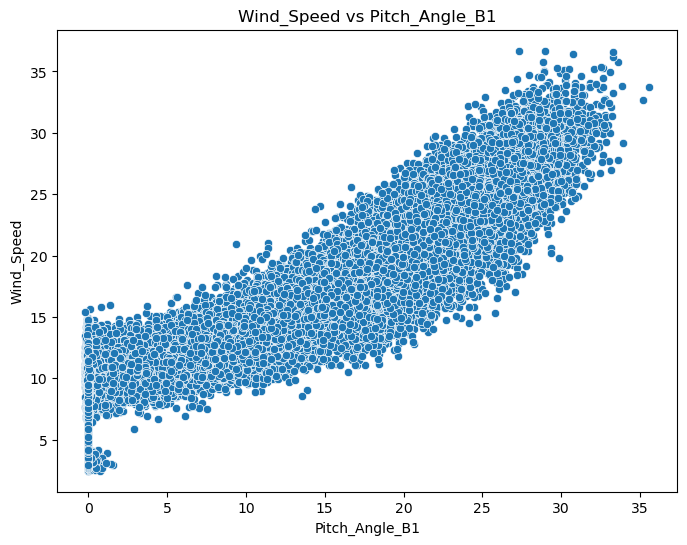

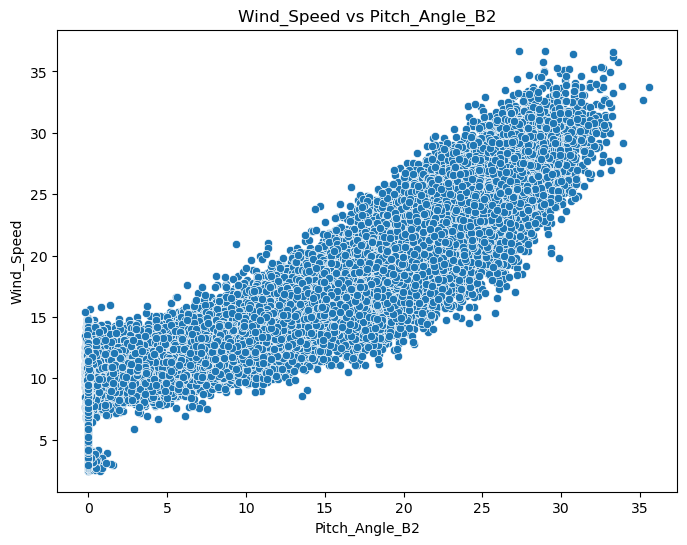

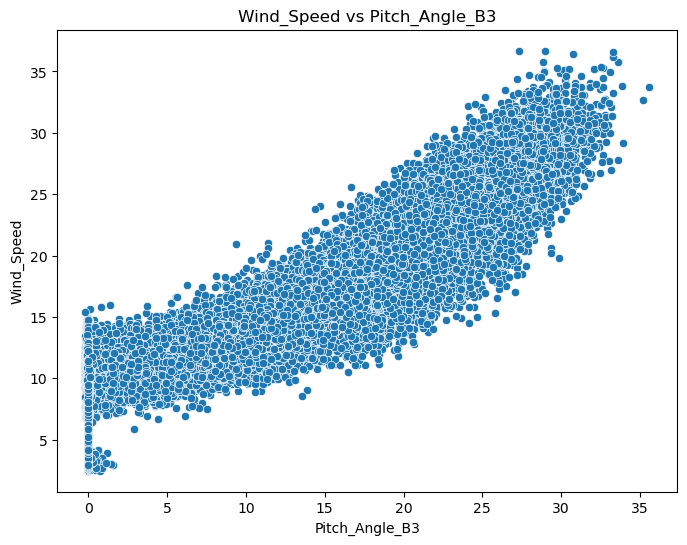

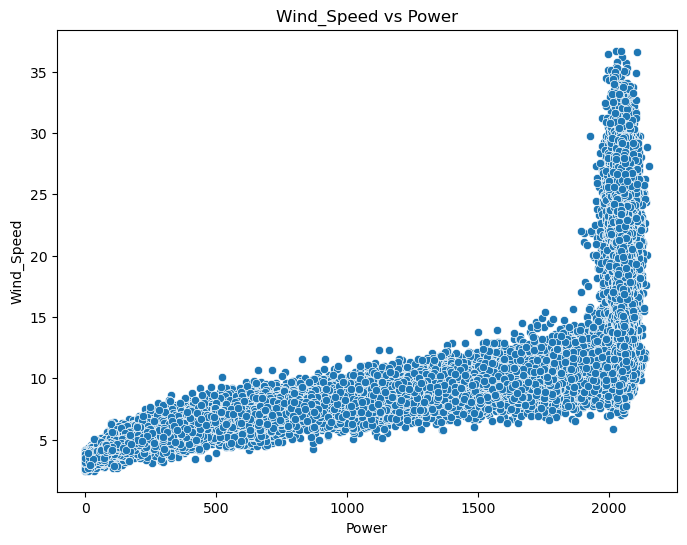

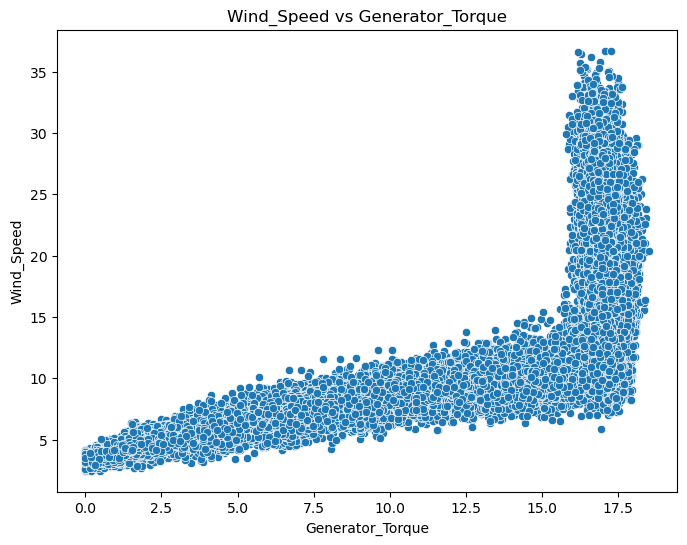

Model Evaluation Metrics for Highly Correlated Features:
Mean Squared Error (MSE): 1.821653738044583
Root Mean Squared Error (RMSE): 1.3496865332530301
Mean Absolute Error (MAE): 0.9751953545571418
R-squared (R2): 0.9567682028248563


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def create_lagged_features(df, selected_features, lag):
    data = df[selected_features].copy()
    columns = [f"{feature}_lag_{i+1}" for i in range(lag) for feature in selected_features]

    for i in range(lag, len(df)):
        for feature in selected_features:
            for j in range(lag):
                data.at[i, f"{feature}_lag_{j+1}"] = data.at[i-lag+j, feature]

    return data.iloc[lag:]


highly_correlated_features = ['Pitch_Angle_B1', 'Pitch_Angle_B2', 'Pitch_Angle_B3', 'Power', 'Generator_Torque']

n = 5

train_data_high_corr = create_lagged_features(big_raw_train_df, highly_correlated_features, n)
test_data_high_corr = create_lagged_features(big_raw_test_df, highly_correlated_features, n)

train_target = big_raw_train_df['Wind_Speed'][n:]
test_target = big_raw_test_df['Wind_Speed'][n:]

model_high_corr = RandomForestRegressor()

model_high_corr.fit(train_data_high_corr, train_target)

feature_importances_high_corr = pd.Series(model_high_corr.feature_importances_, index=train_data_high_corr.columns)

feature_importances_high_corr = feature_importances_high_corr.sort_values(ascending=False)

print("Feature Importances for Highly Correlated Features:")
print(feature_importances_high_corr)

for feature in highly_correlated_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=big_raw_train_df[feature], y=big_raw_train_df['Wind_Speed'])
    plt.xlabel(feature)
    plt.ylabel('Wind_Speed')
    plt.title(f'Wind_Speed vs {feature}')
    plt.show()

predictions_high_corr = model_high_corr.predict(test_data_high_corr)

mse_high_corr = mean_squared_error(test_target, predictions_high_corr)
rmse_high_corr = mean_squared_error(test_target, predictions_high_corr, squared=False)
mae_high_corr = mean_absolute_error(test_target, predictions_high_corr)
r2_high_corr = r2_score(test_target, predictions_high_corr)

print("Model Evaluation Metrics for Highly Correlated Features:")
print(f"Mean Squared Error (MSE): {mse_high_corr}")
print(f"Root Mean Squared Error (RMSE): {rmse_high_corr}")
print(f"Mean Absolute Error (MAE): {mae_high_corr}")
print(f"R-squared (R2): {r2_high_corr}")


Feature Importances for Highly Correlated Features (XGBoost):
Pitch_Angle_B1             0.810344
Power                      0.143036
Generator_Torque           0.003897
Pitch_Angle_B2_lag_6       0.001397
Pitch_Angle_B3_lag_6       0.001260
Pitch_Angle_B2_lag_7       0.001135
Pitch_Angle_B3_lag_9       0.001090
Pitch_Angle_B3_lag_3       0.001063
Generator_Torque_lag_5     0.001032
Pitch_Angle_B2_lag_5       0.001005
Power_lag_10               0.001000
Pitch_Angle_B2_lag_3       0.000967
Power_lag_3                0.000952
Pitch_Angle_B2_lag_10      0.000926
Pitch_Angle_B2_lag_1       0.000926
Pitch_Angle_B3_lag_5       0.000923
Generator_Torque_lag_3     0.000914
Pitch_Angle_B3_lag_7       0.000895
Power_lag_5                0.000880
Pitch_Angle_B3_lag_10      0.000869
Pitch_Angle_B3_lag_1       0.000854
Generator_Torque_lag_7     0.000852
Pitch_Angle_B2_lag_8       0.000848
Pitch_Angle_B2_lag_9       0.000838
Power_lag_6                0.000822
Pitch_Angle_B1_lag_8       0.000818
Ge

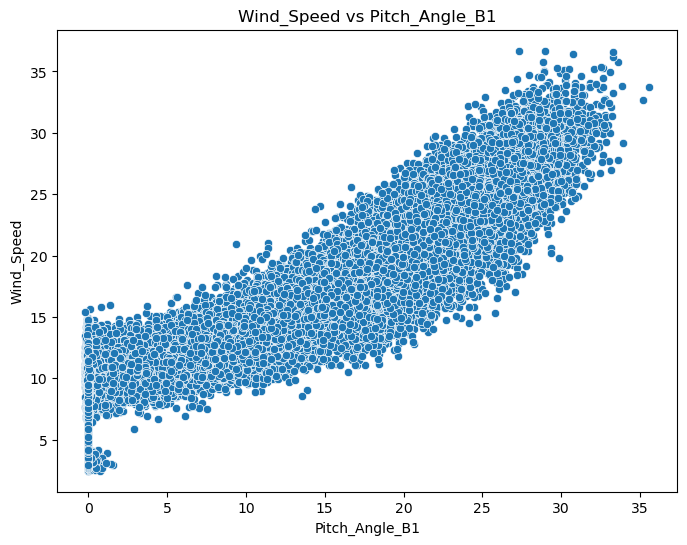

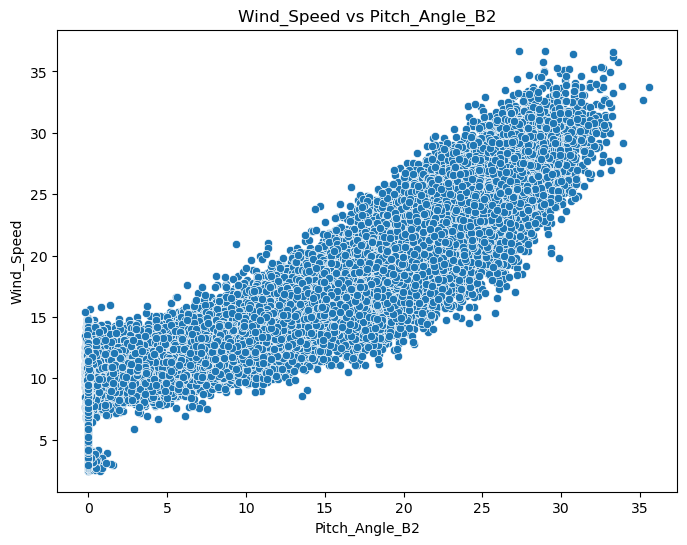

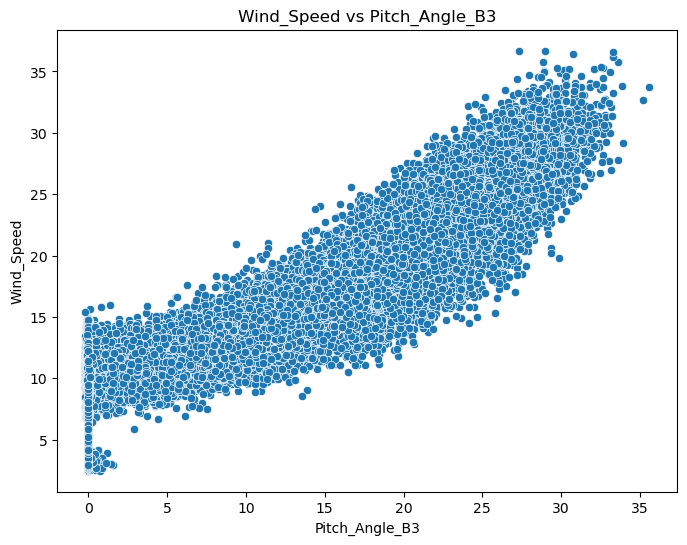

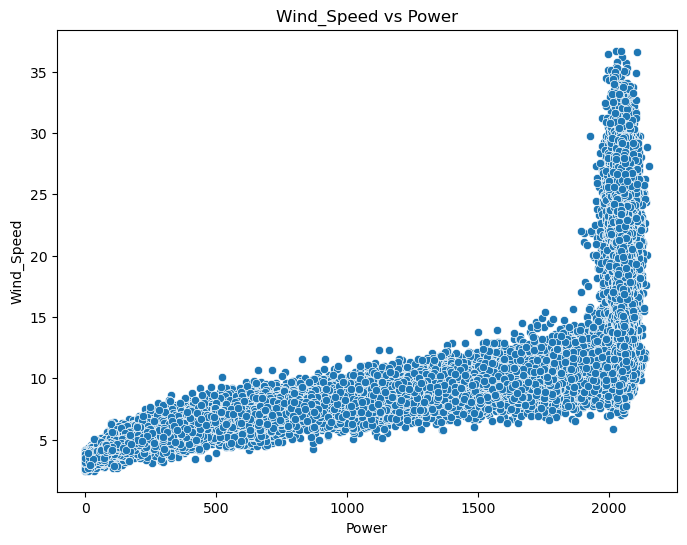

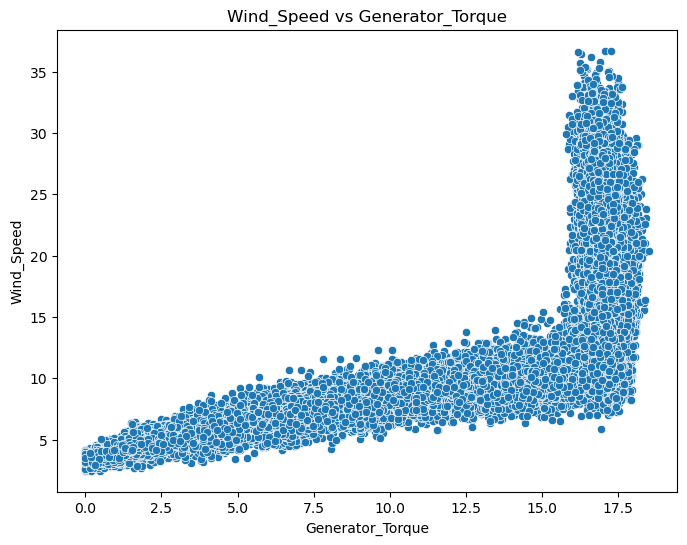

Model Evaluation Metrics for Highly Correlated Features (XGBoost):
Mean Squared Error (MSE): 1.8019076585769653
Root Mean Squared Error (RMSE): 1.3423515558242798
Mean Absolute Error (MAE): 0.9685617685317993
R-squared (R2): 0.9572352265615361


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def create_lagged_features(df, selected_features, lag):
    data = df[selected_features].copy()
    columns = [f"{feature}_lag_{i+1}" for i in range(lag) for feature in selected_features]

    for i in range(lag, len(df)):
        for feature in selected_features:
            for j in range(lag):
                data.at[i, f"{feature}_lag_{j+1}"] = data.at[i-lag+j, feature]

    return data.iloc[lag:]

highly_correlated_features = ['Pitch_Angle_B1', 'Pitch_Angle_B2', 'Pitch_Angle_B3', 'Power', 'Generator_Torque']

n = 10

train_data_high_corr = create_lagged_features(big_raw_train_df, highly_correlated_features, n)
test_data_high_corr = create_lagged_features(big_raw_test_df, highly_correlated_features, n)

train_target = big_raw_train_df['Wind_Speed'][n:]
test_target = big_raw_test_df['Wind_Speed'][n:]

model_high_corr_xgb = XGBRegressor()

model_high_corr_xgb.fit(train_data_high_corr, train_target)

feature_importances_high_corr_xgb = pd.Series(model_high_corr_xgb.feature_importances_, index=train_data_high_corr.columns)

feature_importances_high_corr_xgb = feature_importances_high_corr_xgb.sort_values(ascending=False)

print("Feature Importances for Highly Correlated Features (XGBoost):")
print(feature_importances_high_corr_xgb)

for feature in highly_correlated_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=big_raw_train_df[feature], y=big_raw_train_df['Wind_Speed'])
    plt.xlabel(feature)
    plt.ylabel('Wind_Speed')
    plt.title(f'Wind_Speed vs {feature}')
    plt.show()

predictions_high_corr_xgb = model_high_corr_xgb.predict(test_data_high_corr)

mse_high_corr_xgb = mean_squared_error(test_target, predictions_high_corr_xgb)
rmse_high_corr_xgb = mean_squared_error(test_target, predictions_high_corr_xgb, squared=False)
mae_high_corr_xgb = mean_absolute_error(test_target, predictions_high_corr_xgb)
r2_high_corr_xgb = r2_score(test_target, predictions_high_corr_xgb)

print("Model Evaluation Metrics for Highly Correlated Features (XGBoost):")
print(f"Mean Squared Error (MSE): {mse_high_corr_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_high_corr_xgb}")
print(f"Mean Absolute Error (MAE): {mae_high_corr_xgb}")
print(f"R-squared (R2): {r2_high_corr_xgb}")


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Evaluation Metrics:
Mean Absolute Error (MAE): 5.529045095800578
Mean Squared Error (MSE): 42.13580163385789
Root Mean Squared Error (RMSE): 6.491209566317967
R-squared (R2): -3.882056519355359e-06


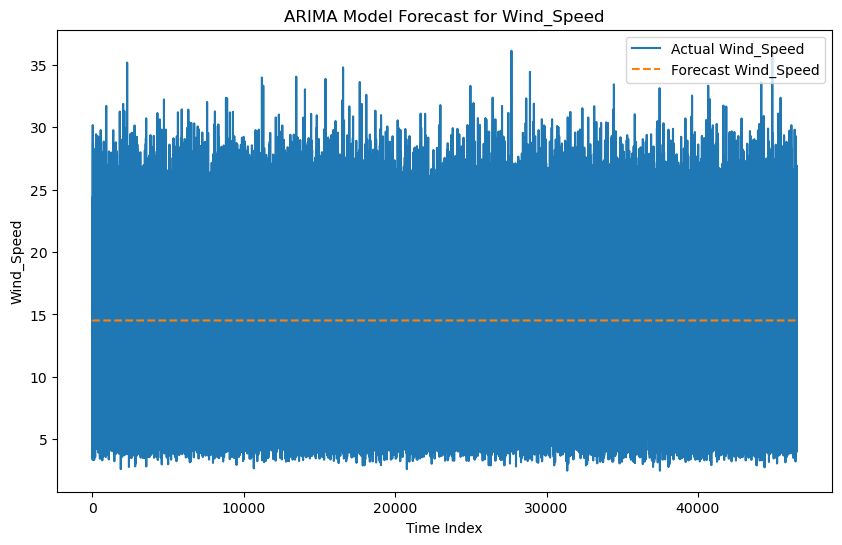

In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


data = pd.concat([big_raw_train_df, big_raw_test_df])

data = data.dropna()

selected_column = 'Wind_Speed'
data = data[selected_column]

order = (1, 1, 1) 
model = ARIMA(data, order=order)
results = model.fit()

forecast = results.forecast(steps=len(big_raw_test_df))

forecasted_values = forecast
actual_values = big_raw_test_df[selected_column]

mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)
rmse = mean_squared_error(actual_values, forecasted_values, squared=False)
r2 = r2_score(actual_values, forecasted_values)

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(big_raw_test_df)), actual_values, label='Actual Wind_Speed')
ax.plot(np.arange(len(big_raw_test_df)), forecasted_values, label='Forecast Wind_Speed', linestyle='dashed')
ax.set_xlabel('Time Index')
ax.set_ylabel('Wind_Speed')
ax.set_title('ARIMA Model Forecast for Wind_Speed')
ax.legend()
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Evaluation Metrics:
Mean Absolute Error (MAE): 2.8361012883330754
Mean Squared Error (MSE): 21.08968513738207
Root Mean Squared Error (RMSE): 3.3485878244446474
R-squared (R2): -1.7494081004931772e-05


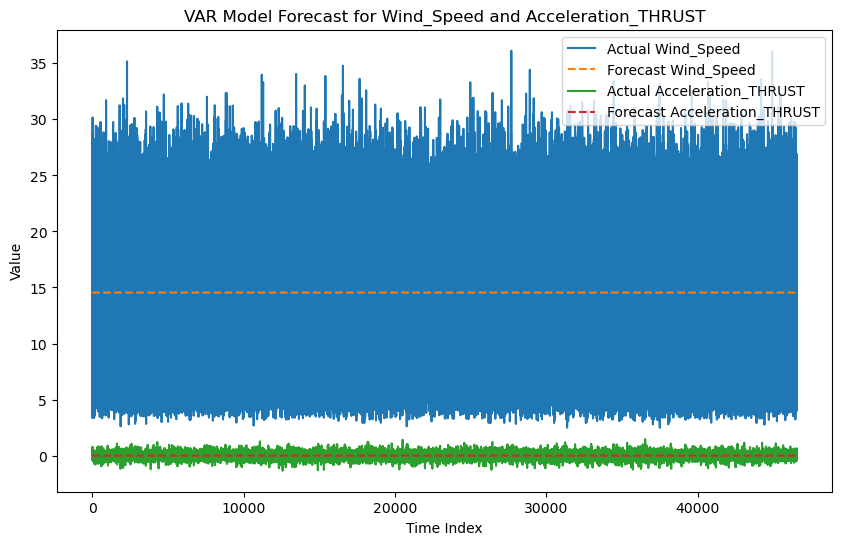

In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


data = pd.concat([big_raw_train_df, big_raw_test_df])

data = data.dropna()

selected_columns = ['Wind_Speed', 'Acceleration_THRUST']

model = VAR(data[selected_columns])
results = model.fit()

forecast = results.forecast(data[selected_columns].values[-len(big_raw_test_df):], len(big_raw_test_df))

forecasted_values = pd.DataFrame(forecast, columns=selected_columns)
actual_values = big_raw_test_df[selected_columns]

mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)
rmse = mean_squared_error(actual_values, forecasted_values, squared=False)
r2 = r2_score(actual_values, forecasted_values)

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(big_raw_test_df)), actual_values['Wind_Speed'], label='Actual Wind_Speed')
ax.plot(np.arange(len(big_raw_test_df)), forecasted_values['Wind_Speed'], label='Forecast Wind_Speed', linestyle='dashed')
ax.plot(np.arange(len(big_raw_test_df)), actual_values['Acceleration_THRUST'], label='Actual Acceleration_THRUST')
ax.plot(np.arange(len(big_raw_test_df)), forecasted_values['Acceleration_THRUST'], label='Forecast Acceleration_THRUST', linestyle='dashed')
ax.set_xlabel('Time Index')
ax.set_ylabel('Value')
ax.set_title('VAR Model Forecast for Wind_Speed and Acceleration_THRUST')
ax.legend()
plt.show()


Evaluation Metrics:
Mean Absolute Error (MAE): 0.9787738997265106
Mean Squared Error (MSE): 1.8372110729517233
Root Mean Squared Error (RMSE): 1.3554375946356672
R-squared (R2): 0.9563976918945654


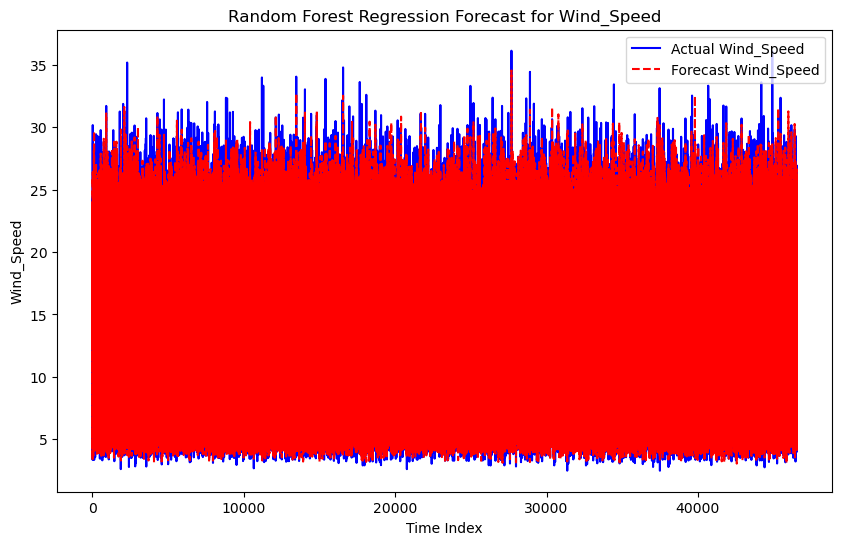

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


input_columns = ['Acceleration_THRUST', 'Pitch_Angle_B1', 'Pitch_Angle_B2', 'Pitch_Angle_B3', 'Rotorposition', 'Generator_Speed',
                 'Rotor_Speed', 'Generator_Torque', 'Power']

X_train = big_raw_train_df.drop(columns=['Wind_Speed', 'Tower_Deflection_RES', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'YAW_Bearing_THRUST'])
X_train = X_train[input_columns]
y_train = big_raw_train_df['Wind_Speed']

X_test = big_raw_test_df.drop(columns=['Wind_Speed', 'Tower_Deflection_RES', 'Tower_Deflection_Y', 'Tower_Deflection_Z', 'YAW_Bearing_THRUST'])
X_test = X_test[input_columns]
y_test = big_raw_test_df['Wind_Speed']

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

forecasted_values = model.predict(X_test)

mae = mean_absolute_error(y_test, forecasted_values)
mse = mean_squared_error(y_test, forecasted_values)
rmse = mean_squared_error(y_test, forecasted_values, squared=False)
r2 = r2_score(y_test, forecasted_values)

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(big_raw_test_df)), y_test, label='Actual Wind_Speed', color='blue')
ax.plot(np.arange(len(big_raw_test_df)), forecasted_values, label='Forecast Wind_Speed', linestyle='dashed', color='red')
ax.set_xlabel('Time Index')
ax.set_ylabel('Wind_Speed')
ax.set_title('Random Forest Regression Forecast for Wind_Speed')
ax.legend()
plt.show()


Evaluation Metrics:
Mean Absolute Error (MAE): 5.529798040832747
Mean Squared Error (MSE): 42.13774724157374
Root Mean Squared Error (RMSE): 6.491359429393333
R-squared (R2): -5.0056929035591224e-05


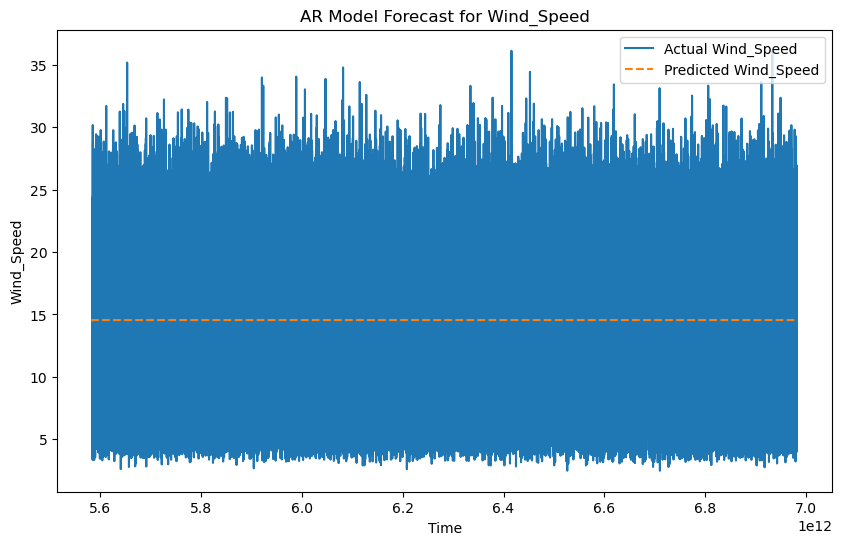

In [14]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

time_interval = 0.03
n_rows = len(data)
time_index = pd.timedelta_range(start='0 seconds', periods=n_rows, freq=f'{time_interval}S')

target_column = 'Wind_Speed'
target_data = data[target_column]

train_size = int(len(target_data) * 0.8) 
train_data, test_data = target_data[:train_size], target_data[train_size:]

lag_order = 5 
model = AutoReg(train_data, lags=lag_order)
results = model.fit()

forecast = results.predict(start=len(train_data), end=len(target_data)-1, dynamic=False)

mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = mean_squared_error(test_data, forecast, squared=False)
r2 = r2_score(test_data, forecast)

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.figure(figsize=(10, 6))
plt.plot(time_index[train_size:], test_data, label='Actual Wind_Speed')
plt.plot(time_index[train_size:], forecast, label='Predicted Wind_Speed', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Wind_Speed')
plt.title('AR Model Forecast for Wind_Speed')
plt.legend()
plt.show()


Epoch 1/10
5815/5815 [==============================] - 154s 26ms/step - loss: 1.0010
Epoch 2/10
5815/5815 [==============================] - 147s 25ms/step - loss: 1.0003
Epoch 3/10
5815/5815 [==============================] - 145s 25ms/step - loss: 1.0002
Epoch 4/10
5815/5815 [==============================] - 145s 25ms/step - loss: 1.0001
Epoch 5/10
5815/5815 [==============================] - 145s 25ms/step - loss: 1.0002
Epoch 6/10
5815/5815 [==============================] - 144s 25ms/step - loss: 1.0001
Epoch 7/10
5815/5815 [==============================] - 146s 25ms/step - loss: 1.0001
Epoch 8/10
5815/5815 [==============================] - 142s 24ms/step - loss: 1.0001
Epoch 9/10
5815/5815 [==============================] - 145s 25ms/step - loss: 1.0001
Epoch 10/10
1452/1452 [==============================] - 15s 10ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 1.9274673461914062
Mean Squared Error (MSE): 14.071146965026855
Root Mean Squared Error (RMSE): 2.2772305011

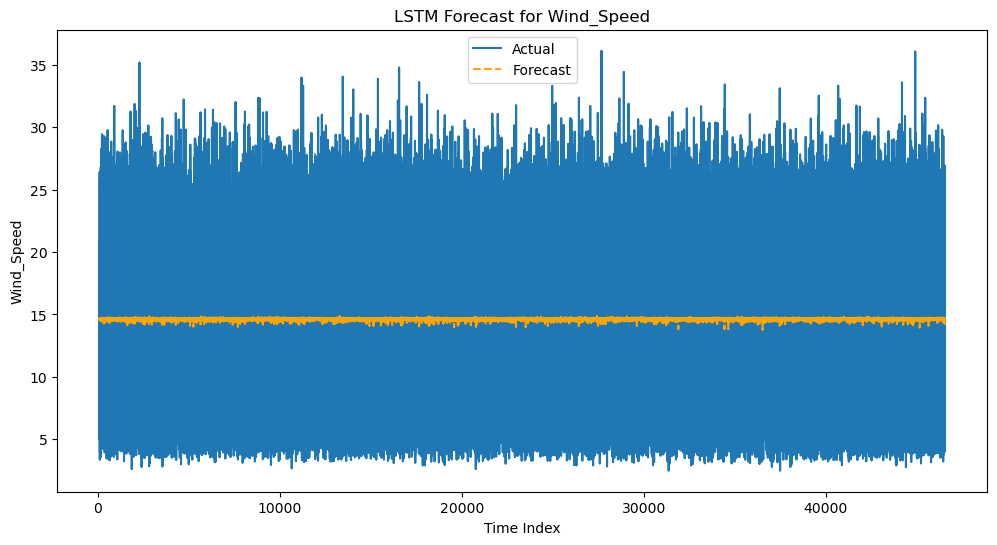

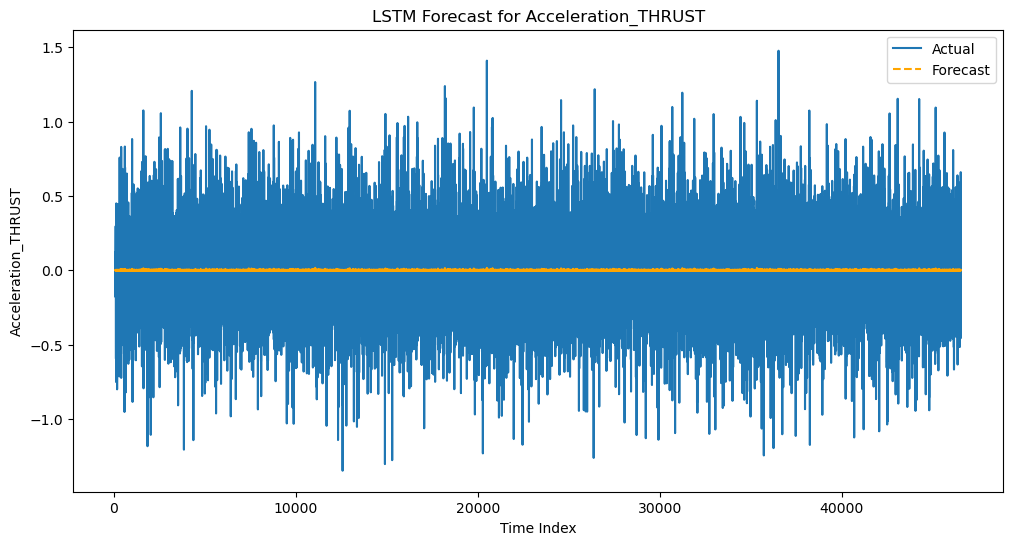

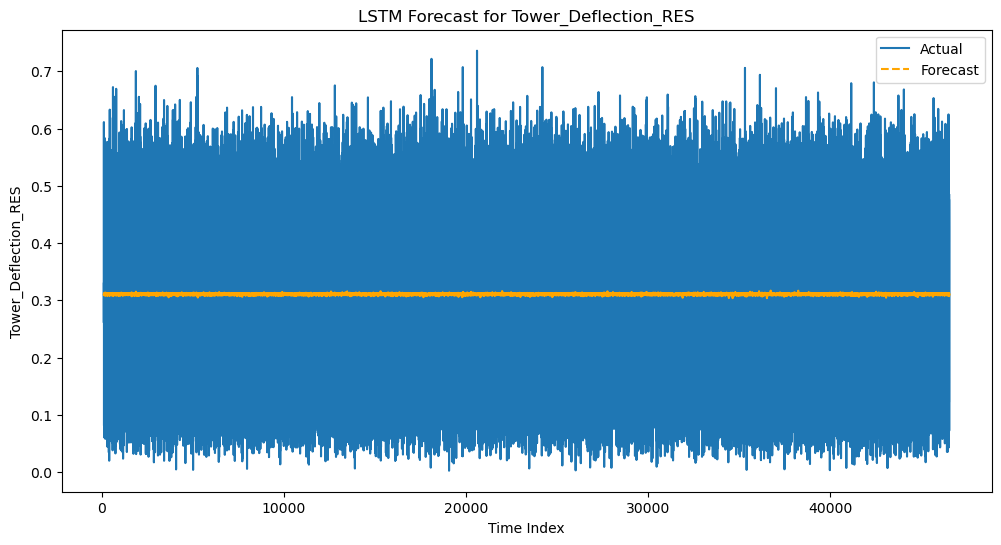

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

selected_columns = ['Wind_Speed', 'Acceleration_THRUST', 'Tower_Deflection_RES']

train_data, test_data = train_test_split(data[selected_columns], test_size=0.2, shuffle=False)

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i : i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

sequence_length = 100 
X_train = create_sequences(train_data, sequence_length)
y_train = train_data[sequence_length:]

X_test = create_sequences(test_data, sequence_length)
y_test = test_data[sequence_length:]

# Create the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, len(selected_columns))))
model.add(Dense(len(selected_columns))) 

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
r2 = r2_score(y_test_inv, y_pred_inv)

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

for i, col in enumerate(selected_columns):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test_inv):], y_test_inv[:, i], label='Actual')
    plt.plot(data.index[-len(y_test_inv):], y_pred_inv[:, i], label='Forecast', linestyle='dashed', color='orange')
    plt.xlabel('Time Index')
    plt.ylabel(col)
    plt.title(f'LSTM Forecast for {col}')
    plt.legend()
    plt.show()


Epoch 1/10
5817/5817 [==============================] - 75s 13ms/step - loss: 1.0005
Epoch 2/10
5817/5817 [==============================] - 79s 14ms/step - loss: 1.0002
Epoch 3/10
5817/5817 [==============================] - 80s 14ms/step - loss: 1.0001
Epoch 4/10
5817/5817 [==============================] - 80s 14ms/step - loss: 1.0001
Epoch 5/10
5817/5817 [==============================] - 80s 14ms/step - loss: 1.0001
Epoch 6/10
5817/5817 [==============================] - 79s 14ms/step - loss: 1.0001
Epoch 7/10
5817/5817 [==============================] - 78s 13ms/step - loss: 1.0001
Epoch 8/10
5817/5817 [==============================] - 78s 13ms/step - loss: 1.0001
Epoch 9/10
5817/5817 [==============================] - 78s 13ms/step - loss: 1.0001
Epoch 10/10
1453/1453 [==============================] - 8s 5ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 5.530649662017822
Mean Squared Error (MSE): 42.13811111450195
Root Mean Squared Error (RMSE): 6.491387367248535
R-squar

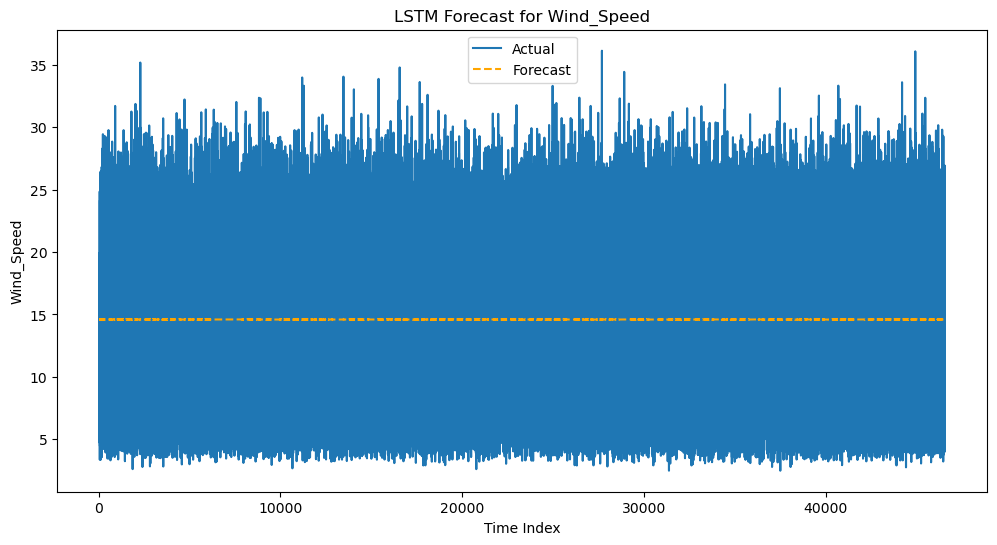

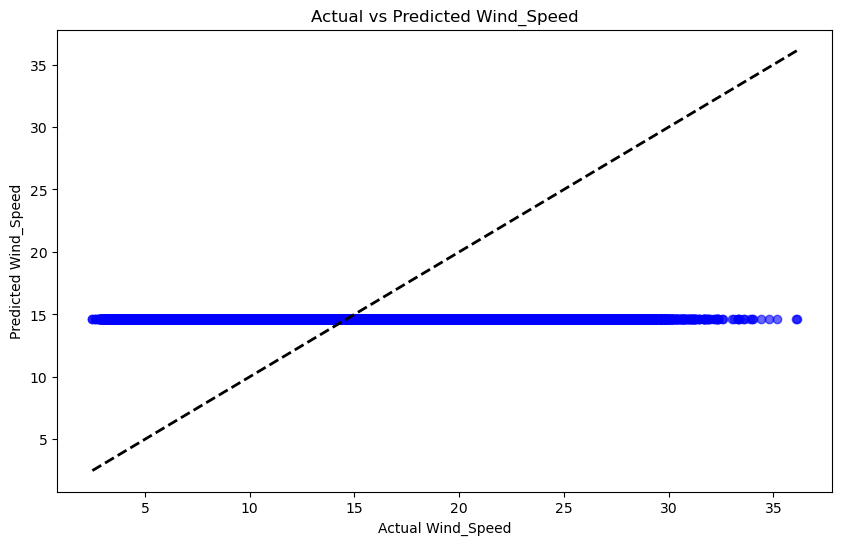

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

selected_columns = ['Wind_Speed']

train_data, test_data = train_test_split(data[selected_columns], test_size=0.2, shuffle=False)

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length - 1):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 50 
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 1)))  
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
r2 = r2_score(y_test_inv, y_pred_inv)

print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

print("Predicted Wind_Speed:")
print(y_pred_inv.flatten())

print("Actual Wind_Speed:")
print(y_test_inv.flatten())

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test_inv):], y_test_inv, label='Actual')
plt.plot(data.index[-len(y_test_inv):], y_pred_inv, label='Forecast', linestyle='dashed', color='orange')
plt.xlabel('Time Index')
plt.ylabel('Wind_Speed')
plt.title('LSTM Forecast for Wind_Speed')
plt.legend()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred_inv, color='b', alpha=0.6)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--', lw=2)
plt.xlabel('Actual Wind_Speed')
plt.ylabel('Predicted Wind_Speed')
plt.title('Actual vs Predicted Wind_Speed')
plt.show()


In [5]:
cols = ['Wind_Speed', 'Acceleration_THRUST', 'Tower_Deflection_RES']
selected_columns = (big_raw_train_df[cols])


In [6]:
cols

['Wind_Speed', 'Acceleration_THRUST', 'Tower_Deflection_RES']

In [7]:
df_for_training= big_raw_train_df[cols]

In [8]:
df_for_training.head(3)

,Wind_Speed,Acceleration_THRUST,Tower_Deflection_RES
0,21.410042,0.003368,0.227441
1,14.375504,0.148383,0.200308
2,14.802893,0.033505,0.283386


In [9]:
scaler= StandardScaler()
scaler=scaler.fit(df_for_training)
df_for_training_scaled= scaler.transform(df_for_training)

In [67]:
df_for_training_scaled

array([[ 1.0546831 ,  0.01855687, -0.6278384 ],
       [-0.02757729,  0.7299198 , -0.83252794],
       [ 0.03817632,  0.1663934 , -0.20577915],
       ...,
       [ 1.3626442 , -0.45444414, -0.31966373],
       [-0.5606704 , -0.4865902 ,  1.5245394 ],
       [-1.3314722 , -0.19187595, -1.0254732 ]], dtype=float32)

In [11]:
trainX=[]
trainY=[]

In [12]:
n_future=1
n_past=14

In [13]:
for i in range (n_past,len(df_for_training_scaled)-n_future+1):
    trainX.append(df_for_training_scaled[i-n_past:i,0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i+n_future-1:i+n_future,0])

trainX,trainY=np.array(trainX),np.array(trainY)

In [14]:
print('trainX shape =={}'.format(trainX.shape))
print('trainY shape =={}'.format(trainY.shape))

trainX shape ==(186158, 14, 3)
trainY shape ==(186158, 1)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')


In [16]:
history=model.fit(trainX,trainY,epochs=10,batch_size=16,validation_split=0.1,verbose=1)

Epoch 1/10
10472/10472 [==============================] - 84s 8ms/step - loss: 1.0005 - val_loss: 0.9982
Epoch 2/10
10472/10472 [==============================] - 74s 7ms/step - loss: 1.0004 - val_loss: 0.9981
Epoch 3/10
10472/10472 [==============================] - 73s 7ms/step - loss: 1.0004 - val_loss: 0.9980
Epoch 4/10
10472/10472 [==============================] - 76s 7ms/step - loss: 1.0003 - val_loss: 0.9981
Epoch 5/10
10472/10472 [==============================] - 76s 7ms/step - loss: 1.0004 - val_loss: 0.9980
Epoch 6/10
10472/10472 [==============================] - 76s 7ms/step - loss: 1.0004 - val_loss: 0.9985
Epoch 7/10
10472/10472 [==============================] - 76s 7ms/step - loss: 1.0004 - val_loss: 0.9980
Epoch 8/10
10472/10472 [==============================] - 72s 7ms/step - loss: 1.0004 - val_loss: 0.9980
Epoch 9/10
10472/10472 [==============================] - 73s 7ms/step - loss: 1.0004 - val_loss: 0.9981
Epoch 10/10
10472/10472 [==============================

In [25]:
n_future=10
forecast=model.predict(trainX[-n_future:])

1/1 [==============================] - 0s 19ms/step


In [21]:
forecast_copies=np.repeat(forecast,df_for_training.shape[1],axis=-1)
y_pred_future=scaler.inverse_transform(forecast_copies)[:,0]

In [26]:
forecast

array([[0.00407703],
       [0.00407703],
       [0.00407703],
       [0.00407703],
       [0.00407703],
       [0.00407703],
       [0.00407703],
       [0.00407703],
       [0.00407703],
       [0.00407703]], dtype=float32)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

n_future = 1
n_past = 14
trainX = []
trainY = []
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

n_future = 10
forecast = model.predict(trainX[-n_future:])


NameError: name 'df_for_training' is not defined

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

n_future = 1
n_past = 14
trainX = []
trainY = []
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.1, random_state=42)

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_data=(valX, valY), verbose=1)

val_predictions = model.predict(valX)

val_predictions = scaler.inverse_transform(val_predictions)
valY = scaler.inverse_transform(valY)

mae = mean_absolute_error(valY, val_predictions)
mse = mean_squared_error(valY, val_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(valY, val_predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Epoch 1/10
10472/10472 [==============================] - 77s 7ms/step - loss: 1.0006 - val_loss: 0.9974
Epoch 2/10
10472/10472 [==============================] - 79s 8ms/step - loss: 1.0005 - val_loss: 0.9975
Epoch 3/10
10472/10472 [==============================] - 77s 7ms/step - loss: 1.0005 - val_loss: 0.9972
Epoch 4/10
10472/10472 [==============================] - 90s 9ms/step - loss: 1.0005 - val_loss: 0.9973
Epoch 5/10
10472/10472 [==============================] - 83s 8ms/step - loss: 1.0004 - val_loss: 0.9983
Epoch 6/10
10472/10472 [==============================] - 83s 8ms/step - loss: 1.0005 - val_loss: 0.9972
Epoch 7/10
10472/10472 [==============================] - 81s 8ms/step - loss: 1.0005 - val_loss: 0.9973
Epoch 8/10
10472/10472 [==============================] - 82s 8ms/step - loss: 1.0005 - val_loss: 0.9977
Epoch 9/10
10472/10472 [==============================] - 84s 8ms/step - loss: 1.0004 - val_loss: 0.9978
Epoch 10/10
582/582 [==============================] - 

ValueError: non-broadcastable output operand with shape (18616,1) doesn't match the broadcast shape (18616,3)

In [80]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split


trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.1, random_state=42)

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_data=(valX, valY), verbose=1)

val_predictions = model.predict(valX)

mae = np.mean(np.abs(valY - val_predictions))

mse = np.mean((valY - val_predictions)**2)

rmse = np.sqrt(mse)

y_mean = np.mean(valY)
r2 = 1 - np.sum((valY - val_predictions)**2) / np.sum((valY - y_mean)**2)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


Epoch 1/10
10472/10472 [==============================] - 80s 7ms/step - loss: 1.0006 - val_loss: 0.9972
Epoch 2/10
10472/10472 [==============================] - 80s 8ms/step - loss: 1.0004 - val_loss: 0.9975
Epoch 3/10
10472/10472 [==============================] - 80s 8ms/step - loss: 1.0005 - val_loss: 0.9972
Epoch 4/10
10472/10472 [==============================] - 83s 8ms/step - loss: 1.0005 - val_loss: 0.9972
Epoch 5/10
10472/10472 [==============================] - 81s 8ms/step - loss: 1.0004 - val_loss: 0.9974
Epoch 6/10
10472/10472 [==============================] - 84s 8ms/step - loss: 1.0005 - val_loss: 0.9977
Epoch 7/10
10472/10472 [==============================] - 84s 8ms/step - loss: 1.0005 - val_loss: 0.9973
Epoch 8/10
10472/10472 [==============================] - 84s 8ms/step - loss: 1.0004 - val_loss: 0.9973
Epoch 9/10
10472/10472 [==============================] - 84s 8ms/step - loss: 1.0003 - val_loss: 0.9975
Epoch 10/10
582/582 [==============================] - 